In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import squarify

### Data importation

In [2]:
data = pd.read_csv("netflix_customer_survey.csv")
data.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


### Data Preperation

In [3]:
X = data.drop(columns=['selected', 'customerid'])
y = data['selected']
X.head()

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show
2,4,15,Disney,one_per_day
3,5,10,HBO,one_per_day
4,1,20,Soccer,one_per_show


Some EDA

In [4]:
y.unique()

array([1, 0], dtype=int64)

In [5]:
X['NumberAccounts'].unique()

array([2, 6, 4, 5, 1, 3], dtype=int64)

In [6]:
X['price'].unique()

array([10,  8, 15, 20, 12, 18], dtype=int64)

In [7]:
X['ExtraContent'].unique()

array(['HBO', 'Marvel', 'Disney', 'Soccer', 'less content',
       'Prime originals'], dtype=object)

In [8]:
X['ads'].unique()

array(['one_per_day', 'one_per_show', 'none'], dtype=object)

In [9]:
# One-hot encode the features
X_dummy = pd.get_dummies(X, columns=X.columns)
X_dummy.head(1)

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


### Logistic Regression Model

In [10]:
model = sm.Logit(y, X_dummy)
model_results = model.fit()
model_results.summary()

Optimization terminated successfully.
         Current function value: 0.649426
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2979
Method:                           MLE   Df Model:                           20
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                 0.06307
Time:                        17:59:27   Log-Likelihood:                -1948.3
converged:                       True   LL-Null:                       -2079.4
Covariance Type:            nonrobust   LLR p-value:                 3.781e-44
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7047   1.73e+06  -4.06e-07      1.000    -3.4e+06     3.4e+06
NumberAccounts_2                -0.0733   1.73e+06  -4.23e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_3                -0.0219   1.73e+06  -1.26e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_4                 0.1252   1.73e+06   7.22e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_5                 0.1318   1.73e+06    7.6e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_6                 0.4976   1.73e+06   2.87e-07      1.000    -3.4e+06     3.4e+06
price_8                          0.2972   1.41e+06    2.1e-07      1.000   -2.77e+06    2.77e+06
price_10                         0.2207   1.41e+06   1.56e-07      1.000   -2.77e+06    2.77e+06
price_12                         0.2020   1.41e+06   1.43e-07      1.000   -2.77e+06    2.77e+06
price_15                         0.0197   1.41e+06    1.4e-08      1.000   -2.77e+06    2.77e+06
price_18                        -0.1030   1.41e+06   -7.3e-08      1.000   -2.77e+06    2.77e+06
price_20                        -0.6819   1.41e+06  -4.83e-07      1.000   -2.77e+06    2.77e+06
ExtraContent_Disney              0.2282   2.69e+06    8.5e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_HBO                 0.2270   2.69e+06   8.45e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_Marvel              0.1452   2.69e+06   5.41e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_Prime originals     0.1279   2.69e+06   4.76e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_Soccer             -0.2048   2.69e+06  -7.63e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_less content       -0.5689   2.69e+06  -2.12e-07      1.000   -5.26e+06    5.26e+06
ads_none                         0.2082   1.59e+06   1.31e-07      1.000   -3.12e+06    3.12e+06
ads_one_per_day                  0.1092   1.59e+06   6.87e-08      1.000   -3.12e+06    3.12e+06
ads_one_per_show                -0.3627   1.59e+06  -2.28e-07      1.000   -3.12e+06    3.12e+06
================================================================================================
"""

### Visualization

In [11]:
result_df = pd.DataFrame({"Param_names": model_results.params.keys(),
                          "Partworth": model_results.params.values,
                          "P_values": model_results.pvalues,
                          "std_err": model_results.bse}).reset_index(drop=True)

In [12]:
result_df.head()

,Param_names,Partworth,P_values,std_err
0,NumberAccounts_1,-0.704678,1.0,1.733553e+06
1,NumberAccounts_2,-0.073345,1.0,1.733553e+06
2,NumberAccounts_3,-0.021924,1.0,1.733553e+06
3,NumberAccounts_4,0.125190,1.0,1.733553e+06
4,NumberAccounts_5,0.131812,1.0,1.733553e+06


In [13]:
result_df = result_df.sort_values(by='Partworth')

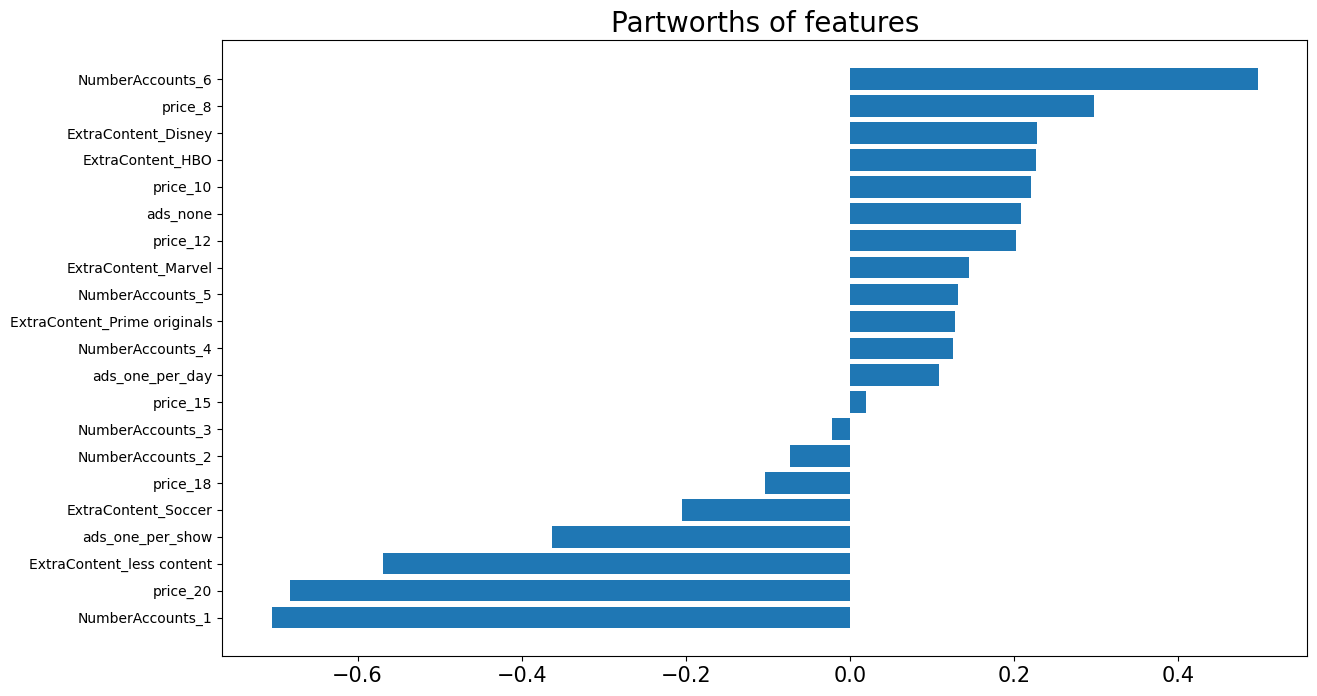

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Partworths of features', fontsize=20)
values = result_df['Partworth']
plt.barh(result_df['Param_names'], values)
plt.xticks(fontsize=15)
plt.show()

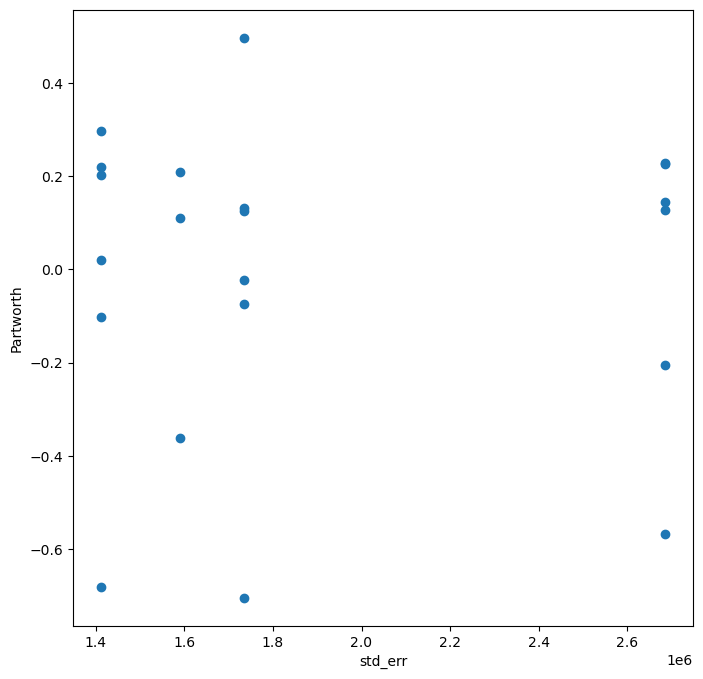

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(result_df['std_err'], result_df['Partworth'])
plt.xlabel('std_err')
plt.ylabel('Partworth');

### Specific Drivers

Ads

In [16]:
attributes = []
coeff = []
for i in range(len(result_df)):
    if result_df.iloc[i,0].find('ads') > -1:
        attributes.append(result_df.iloc[i,0])
        coeff.append(result_df.iloc[i, 1])

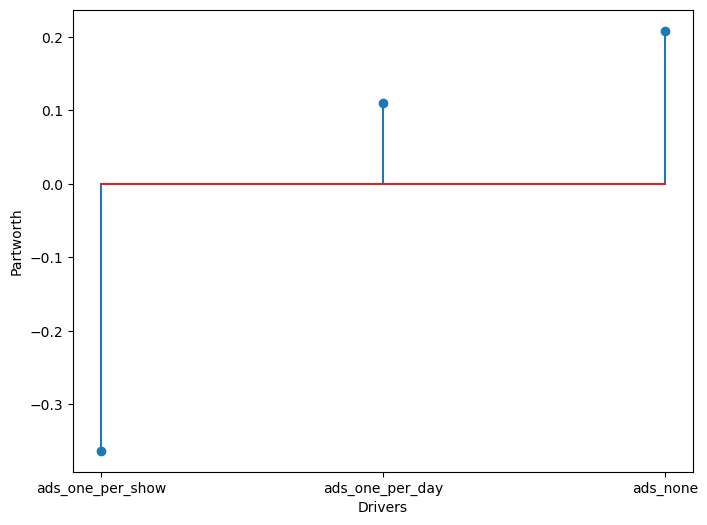

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylabel('Partworth')
plt.xlabel('Drivers')
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coeff,
                                          use_line_collection=True)

Prices

In [18]:
attributes = []
coeff = []
for i in range(len(result_df)):
    if result_df.iloc[i,0].find('price') > -1:
        attributes.append(result_df.iloc[i,0])
        coeff.append(result_df.iloc[i, 1])

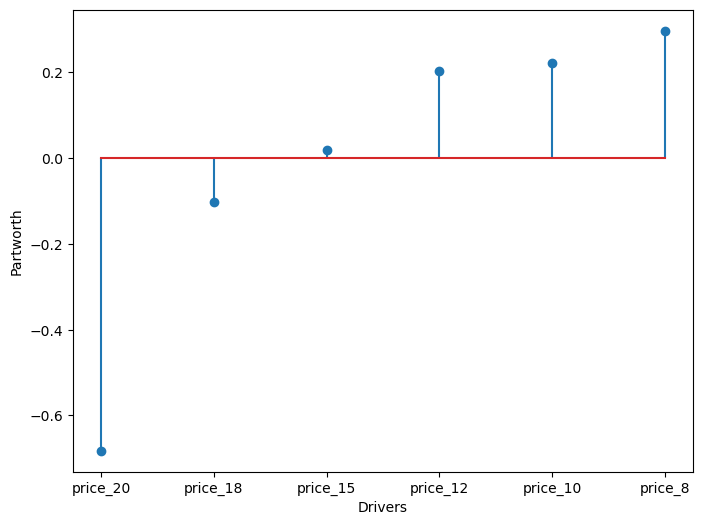

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylabel('Partworth')
plt.xlabel('Drivers')
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coeff,
                                          use_line_collection=True)

### Feature importance

In [20]:
# Coefficients of features
features_part_worth = dict()
for key, coeff in model_results.params.items():
    split_keys = key.split('_')
    feature = split_keys[0]
    if feature not in features_part_worth:
        features_part_worth[feature] = list()
    features_part_worth[feature].append(coeff)
features_part_worth

{'NumberAccounts': [-0.7046777248099881,
  -0.07334519715651555,
  -0.02192357864905025,
  0.12518996872029473,
  0.13181249795084016,
  0.49758234443231275],
 'price': [0.2971766420050612,
  0.2206984310260251,
  0.20197851398262365,
  0.019744597669610817,
  -0.10303417522353696,
  -0.681925559395553],
 'ExtraContent': [0.22823505149202916,
  0.22703120725064577,
  0.1452108308643314,
  0.12785786835546448,
  -0.20480293491827004,
  -0.5688938306064477],
 'ads': [0.20818004481556254, 0.10917767059490621, -0.36271935945387856]}

In [21]:
importance_per_feature = {k : max(v) - min(v) for k, v in features_part_worth.items()}
importance_per_feature

{'NumberAccounts': 1.2022600692423009,
 'price': 0.9791022014006142,
 'ExtraContent': 0.7971288820984769,
 'ads': 0.5708994042694411}

In [22]:
total_importance = sum(importance_per_feature.values())
total_importance

3.549390557010833

In [23]:
# Calculate the relative importance
relative_importance_per_feature = {
    k: round(100 * v/total_importance, 1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.5, 'ads': 16.1}

In [24]:
df_importances = pd.DataFrame(list(relative_importance_per_feature.items()),
                              columns=['Feature', 'Relative Importance'])

In [25]:
df_importances

,Feature,Relative Importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.5
3,ads,16.1


Draw the plot that visualize the relative feature importance

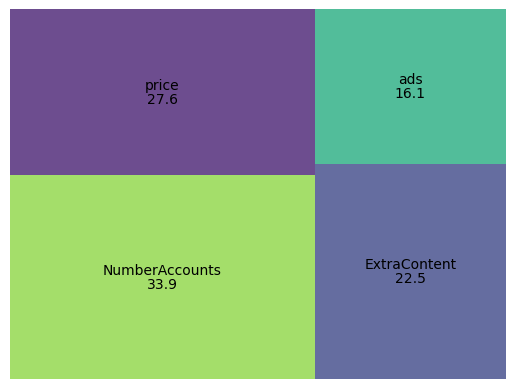

In [31]:
squarify.plot(sizes=df_importances['Relative Importance'],
              label=df_importances['Feature'],
              alpha=.8,
              value=df_importances['Relative Importance'])
plt.axis('off')
plt.show()